In [1]:
from datasets import load_dataset
from transformers import pipeline
from PIL import ImageDraw, ImageFont

In [2]:
dataset = load_dataset("NarchAI1992/Farmhouse_interior", split="train")

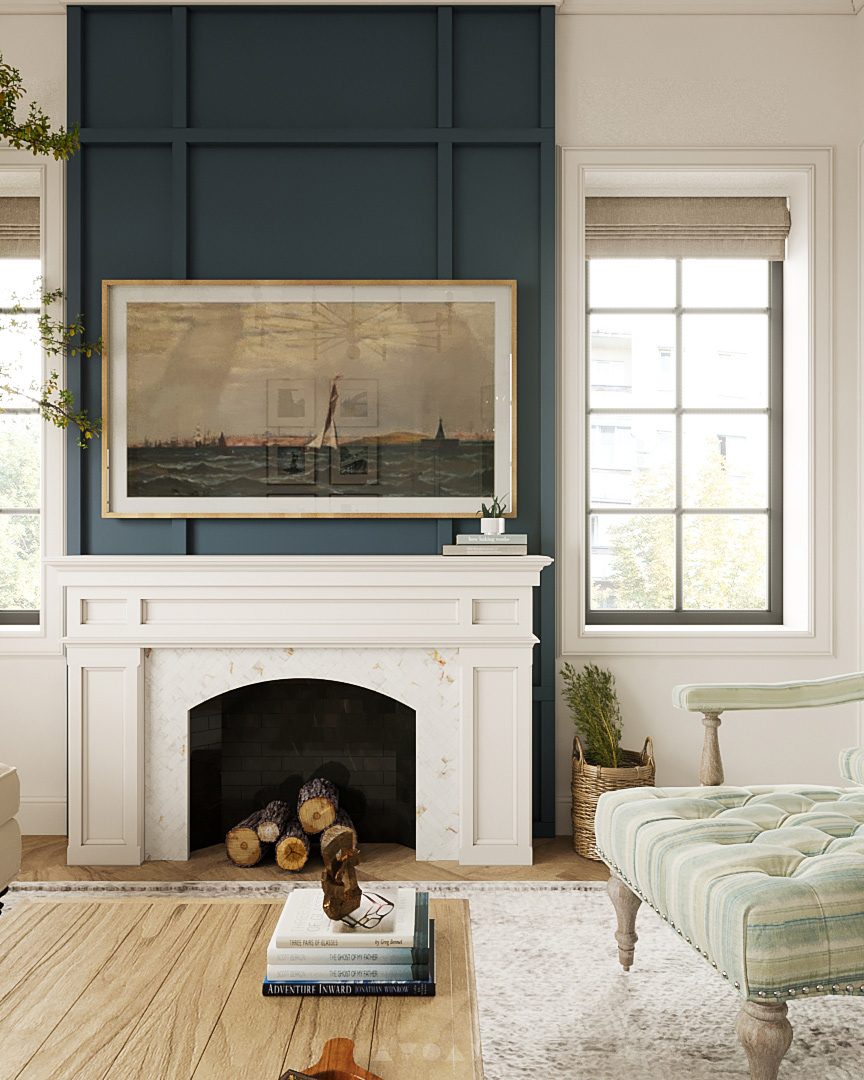

In [3]:
image = dataset[0]["image"]
image

In [4]:
obj_detector = pipeline("zero-shot-object-detection", model="google/owlvit-base-patch32")

Device set to use cpu


In [5]:
objects = ["book", "chair", "painting", "plant", "window"]

In [6]:
image_detections = obj_detector(image, objects)
image_detections

[{'score': 0.2886934280395508,
  'label': 'plant',
  'box': {'xmin': 556, 'ymin': 658, 'xmax': 629, 'ymax': 774}},
 {'score': 0.266825795173645,
  'label': 'book',
  'box': {'xmin': 261, 'ymin': 889, 'xmax': 436, 'ymax': 999}},
 {'score': 0.23213015496730804,
  'label': 'painting',
  'box': {'xmin': 92, 'ymin': 279, 'xmax': 512, 'ymax': 524}},
 {'score': 0.17222580313682556,
  'label': 'window',
  'box': {'xmin': 574, 'ymin': 181, 'xmax': 816, 'ymax': 640}},
 {'score': 0.15007001161575317,
  'label': 'plant',
  'box': {'xmin': 0, 'ymin': 37, 'xmax': 109, 'ymax': 506}},
 {'score': 0.13590668141841888,
  'label': 'plant',
  'box': {'xmin': 556, 'ymin': 650, 'xmax': 640, 'ymax': 857}},
 {'score': 0.11016795039176941,
  'label': 'plant',
  'box': {'xmin': 476, 'ymin': 491, 'xmax': 511, 'ymax': 537}}]

In [7]:
draw = ImageDraw.Draw(image)

In [8]:
for detection in image_detections:
    box = detection["box"]
    label = detection["label"]
    score = detection["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=4)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white", font=ImageFont.truetype(r'C:\Users\System-Pc\Desktop\arial.ttf', 40))

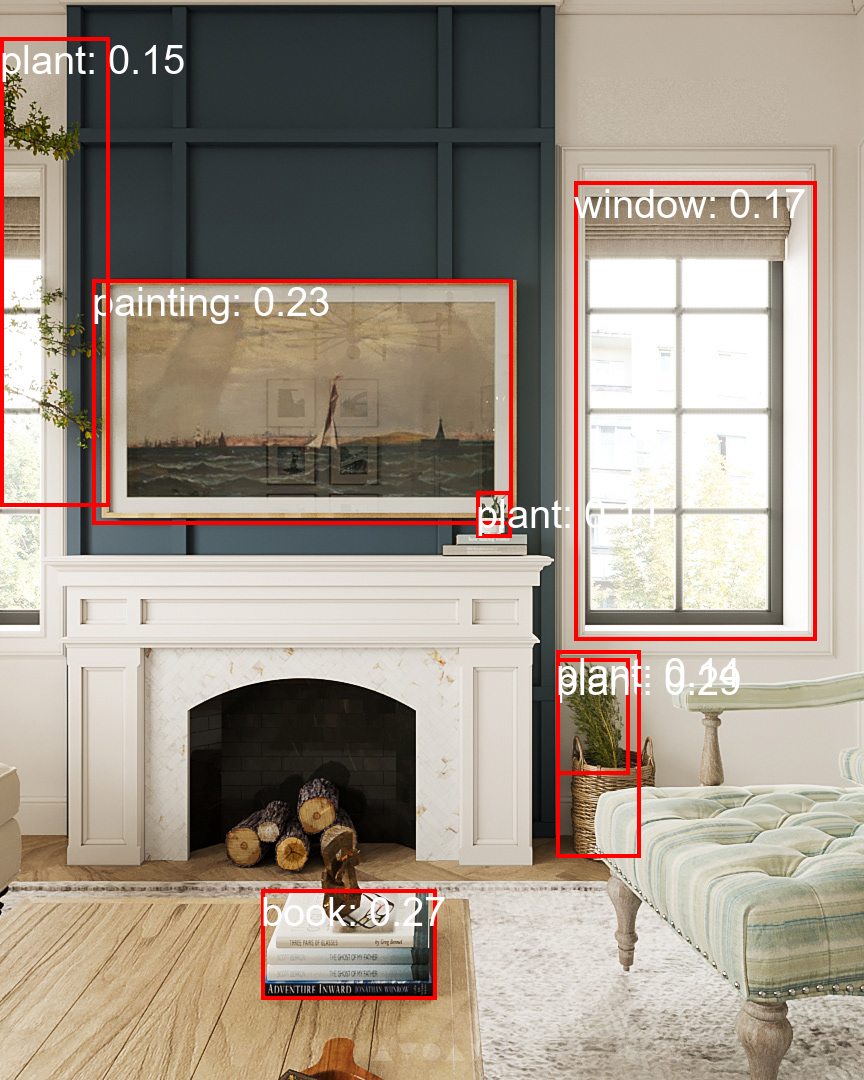

In [9]:
image